In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# LOADING THE DATASET

In [3]:
housing= pd.read_csv(r"C:\Users\Kashsih Taneja\Desktop\housing.csv")

In [4]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# EDA

In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

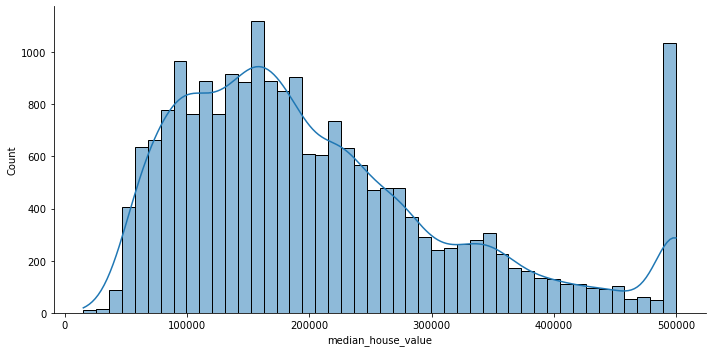

In [6]:
sns.displot(housing,x='median_house_value',kde = True, height= 5, aspect = 2)

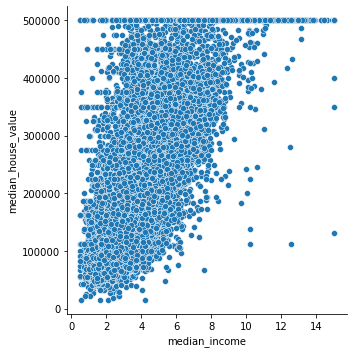

In [7]:
sns.relplot(data=housing, x='median_income', y='median_house_value', kind='scatter')

# REMOVING OUTLIERS

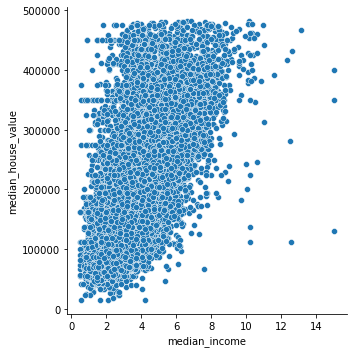

In [8]:
Q1 = np.percentile(housing['median_house_value'], 25)
Q3 = np.percentile(housing['median_house_value'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
housing_1 = housing[(housing['median_house_value'] < upper_bound ) & (housing['median_house_value'] > lower_bound)]
sns.relplot(data=housing_1, x='median_income', y='median_house_value', kind='scatter')

In [9]:
corr_matrix = housing_1.corr()

# MODELLING

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

<AxesSubplot:>

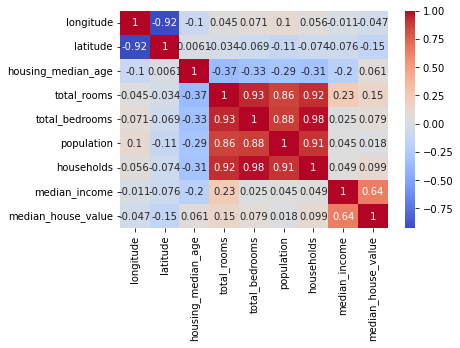

In [36]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [11]:
housing_2 =pd.get_dummies(housing_1, columns=['ocean_proximity'])

In [12]:
housing_2['total_bedrooms'] =  housing_2['total_bedrooms'].fillna('0')

In [13]:
x = housing_2.drop('median_house_value', axis=1)

In [14]:
y = pd.DataFrame(housing_1['median_house_value'])

In [16]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size= 0.2, random_state=0)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
y_pred

array([[129212.95955334],
       [316492.48129285],
       [216685.84588681],
       ...,
       [243061.93179908],
       [269538.83816015],
       [ 38471.45100013]])

In [22]:
lrScore=r2_score(y_test,y_pred)
print(round(lrScore,2))

0.62


In [39]:
rf=RandomForestRegressor(n_estimators=140)
rf.fit(X_train,y_train.values.ravel())
y_predRf=rf.predict(X_test)
rfScore=r2_score(y_test,y_predRf)
print(round(rfScore,2))

0.79


In [40]:
y_predRf

array([157426.42857143, 394569.28571429, 168374.28571429, ...,
       222164.28571429, 242791.42857143,  54629.28571429])